# Representación numérica

## 1. Introducción - redondeo y truncamiento

La forma en la que el ordenador maneja y almacena números introduce de forma
intrínseca un error numérico.
En general, el ordenador almacena solo un cierto número de cifras
significativas, $n$. Dado un número $x \in \mathbb{R}$ con $m > n$ cifras significativas, se tienen
dos opciones:
 - Redondeo: aproximar $x$ al número almacenable más próximo
 - Truncamiento: almacenar las primeras $n$ cifras de $m$ (descartando las
   $m-n$ restantes).
   
El error cometido en este paso se conoce respectivamente como error de
redondeo/truncamiento.

## 2. Representación de coma flotante
La representación habitual de los números puede dar lugar a problemas
inesperados al tratarlos numéricamente. Analiza el siguiente ejercicio:

**Ejercicio 1 -**  Considere una caja registradora antigua que maneja
magnitudes entre 0 y 999.99 unidades. Observa que hay cinco *espacios de
trabajo* en esta representación.
1. ¿Cuál es el menor incremento entre números consecutivos?
2. ¿Qué cantidad se pagaría por un artículo, si cuesta 256.789? 
3. ¿Qué errores relativos se cometerían en una transacción de un objeto de que
   cuesta 256.789 (supón que se redondea)? ¿Y en uno de valor 3.476? Analiza el resultado


In [1]:
# Sol ej 1

err_relativo1 = abs(256.789 - 256.79) / 256.789
err_relativo2 = abs(3.476 - 3.48) / 3.476 

print(err_relativo1)
print(err_relativo2)


3.8942478066941985e-06
0.0011507479861910253


Parece que tiene sentido que los errores de redondeo/truncamiento cometidos al
trabajar con un ordenador sean del mismo orden independientemente del número 
almacenado. Con tal motivo, se introdujo la representación de coma flotante, un
estándar para la representación numérica en ordenador. Se explica a continuación.

Un *bit* puede ser pensado como un *espacio en la memoria* donde almacenar
información. 
Para almacenar un determinado número en memoria con suficiente precisión, la 
norma IEEE754 estableció un convenio que es el que usan la mayor parte de 
arquitecturas hoy en día: la representación de coma flotante.
Veamos en qué consiste. Para ello, comenzamos introduciendo ciertas
definiciones generales:

Un número $x \in \mathbb{R} - \{0\}$ puede ser trivialmente representado de la
siguiente forma:
$$x = \left( -1 \right)^{s} \cdot m \cdot \beta^e$$
donde:
 - $s = \mathbf{sgn} \left( x \right)$ es el signo de x.
 - $m$ es la mantisa.
 - $\beta$ es la base.
 - $e$ es el exponente.

<!--
Además, será una representación *normalizada* si la mantisa tiene la forma
$0.d_1d_2d_3...$ con $d_1\neq 0$. En ese caso, las cifras de $m$ reciben el
nombre de *cifras significativas*.
-->

Si **se limita el número de cifras significativas de $m$ y $e$** obtendremos
una representación de **coma flotante** $x_F$ de $x$. 
Ya no estaremos en el cuerpo de los números reales, ya que habrá "saltos" entre 
los distintos números que podemos representar. 
A este nuevo conjunto de números lo llamaremos "cuerpo de números en 
representación de coma flotante", $\mathbb{F}$ (o por simplicidad "floats").

La mayor parte de los ordenadores trabajan con base dos, por lo vamos a
centrarnos en el desarrollo para $\beta = 2$. 
Sin embargo, el análisis que veremos a continuación puede hacerse de forma 
análoga para cualquier otra base.

En base 2 se suele trabajar con una variación de la representación vista 
anteriormente.
Como la cifra más significativa en base 2 siempre es 1, un número $x_F$ puede
expresarse como: 
$$x_F = \left( -1 \right)^{s} \cdot 1.f \cdot 2^e$$
siendo $f$ la parte fraccionaria de la mantisa. Sin embargo, esta aún no es la 
representación definitiva que vamos a usar.

El número de bits reservados para $e$ y $m$ determinará la precisión de un 
cierto número $x_F \in \mathbb{F}$. 
En precisión simple ($32$ bits), el signo ocupa $1$ bit, el exponente $8$ y la 
mantisa $23$. 
La mayor parte de programas trabajan con **precisión doble** ($64$ bits). 
En este caso, el signo ocupa $1$ bit, el exponente $11$ y la mantisa $52$. 
Con 11 bits asignados al exponente, este puede tomar valores hasta $2048$. 
Como queremos ser capaces de representar números muy pequeños, a priori sería 
necesario reservar algún bit extra para el signo del propio exponente. 
Esto se puede evitar modificando un poco la representación anterior. 
Para conseguirlo, se resta $1023$ al exponente para normalizarlo. 
El valor que se resta al exponente se denomina *sesgo*.

Todo esto da lugar a la siguiente representación de coma flotante para números
en precisión doble en base 2:
$$x_F = \left( -1 \right)^{s} \cdot 1.f \cdot 2^{(e-1023)}$$
Para obtener a qué número real equivale un *float* $x_F \in \mathbb{F}$ dada
su tupla $\left( s, e, f \right)$, basta con convertir estos tres valores a
base 10 e introducirlos en la expresión anterior.

Por ejemplo, el *float*:
$$1 \quad 10000000010 \quad 1000000000000000000000000000000000000000000000000000$$
en base $10$ sería:
 - signo: $s=1 \rightarrow \left( -1 \right)^{1} \rightarrow$ negativo
 - exponente final: $e - 1023 = 1 \cdot 2^{10} + 1 \cdot 2^1 - 1023 = 3$
 - parte decimal de la mantisa: $f = 1 \cdot \frac{1}{2^1} + 0 \cdot \frac{1}{2^2} + \cdots = 0.5$

<center>

<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=floating_point_visualization.png&t=yjQNiSSzhXQlfYF&scalingup=0" width="500"/>
</div>

</center>

Y por tanto el número buscado es $(−1)^1 \cdot 2^3 \cdot (1 + 0.5) = -12.0$.
Usando Python para los cálculos:  

In [1]:
from math import e

def ieee754_conversion(s: str, e: str, f: str) -> float:
    """Converts the tuple (s, e, m) to a floating point representation"""
    sign = (-1)**int(s)
    e = int(e, 2)
    exponent_total = e - 1023
    mantissa = 1 + int(f, 2) * 2 ** (-len(f))
    return sign * 2 ** exponent_total * mantissa

s = "1"
e = "1000000010"
f = "1000000000000000000000000000000000000000000000000000"

print(ieee754_conversion(s, e, f))


-8.950008877440248e-154


**Ejercicio 2 -** ¿Cómo se representa el número 15.0 (base 10) según
IEEE754? ¿cuál es el mayor número menor que el 15.0? ¿y el menor mayor que el 15.0?

In [ ]:
# Sol Ej 2

Respecto al ejercicio anterior, observa que el número IEEE754 para 15.0 no sólo
representa este número, sino también todos los reales a medio camino entre sus
vecinos inmediatos. 
Así que cualquier resultado dentro de este intervalo se le asignará el 
valor 15.0.
Llamamos *hueco* (*gap*) a la distancia entre un número y el siguiente.
Llamamos *número máquina* a los números que tienen una representación exacta.
Como la fracción de la mantisa se multiplica por $2^{-1023}$, el *gap* crece a 
medida que crece el número representado.
Esta limitación es el precio que se paga usando IEEE754 para lidiar con la 
dicotomía *rango representable - precisión*. 
No obstante, suele ser un precio asumible porque el *gap* en los números 
grandes sigue siendo pequeño en relación con el tamaño del propio número.

<center>

<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=gap.png&t=wv1JgEUWN86El65&scalingup=0" width="500"/>
</div>

</center>

La librería ```numpy``` ofrece la función ```spacing()``` para calcular este
*gap*.


el gap por la derecha normalmente es mayor que el gap por la izq (porque es posible que tenga que correr la coma hacia la derecha perdiendo precisión), a priori son distintos a no ser que el numero de cifras sifnificativas sea muy pequeño. 

el spacing es la distancia entre los puntos medios de el gap por a izquierda y el gap por la derecha


**Ejercicio 3 -** Usando Python, muestra en una gráfica cómo evoluciona el tamaño del
*gap* según crece el valor del *float* representado.

In [2]:
# Sol Ej 3

import matplotlib.pyplot as plt
import numpy as np

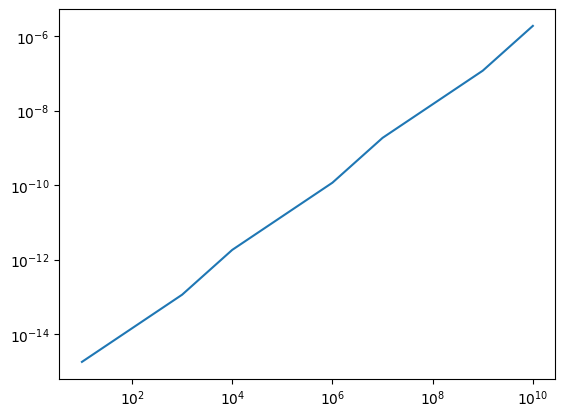

In [3]:
x = np.logspace(1, 10, 10)
y = np.array([np.spacing(x_val) for x_val in x])


plt.xscale('log')
plt.yscale("log")
plt.plot(x, y)

como se confirma va creciendo el espacio entre ambos porque segun crecen los numeros hay menos espacio apra la precision en la mantisa y por tanto mayor porbabilidad de error de precisión



**Ejercicio 4 -** Usando Python, comprueba que al sumar a un determinado
número una cantidad inferior a la mitad de su *gap* se obtiene el mismo número.

In [4]:
# Sol Ej 4


value = 15

right_gap = np.nextafter(15, 16) - value

print(right_gap)

print( value ==  value + 0.49 * right_gap)

print( value ==  value + 0.51 * right_gap)

1.7763568394002505e-15
True
False


Existen algunos casos especiales en la representación de coma flotante: cuando
$e = 0$ (es decir, $e = 00000000000$ (base2)) y cuando $e = 2047$ (es decir, $e
= 11111111111$ (base2)). 
Cuando el exponente es 0, el 1 inicial de la fracción toma el valor 0 en su
lugar. 
El resultado es un **número subnormal**, que se calcula mediante la expresión 
$(-1)^s \cdot (0.f) \cdot 2^{e-1022}$ (observa que el sesgo ahora es 1022 en 
lugar de 1023).
Cuando el exponente es 2047 y $f$ es distinto de cero, el resultado es "NaN",
lo que significa que el número es indefinido. 
Cuando el exponente es 2047 y $f = 0$, el resultado es el $\pm \infty$ (el 
signo lo sigue dando $s$).


**Ejercicio 5 -** Calcule el valor en base 10 para 

$$0 \quad 11111111110 \quad 1111111111111111111111111111111111111111111111111111$$ 

y para

$$0 \quad 00000000001 \quad 000000000000000000000000000000000000000000000000000$$

(respectivamente el mayor y el menor (no subnormal) número representable usando precisión doble)

Comprueba tus resultados usando la librería ```sys``` en Python (en concreto,
usa las funciones ```sys.float_info.max``` y ```sys.float_info.min```).

In [ ]:
# Sol Ej 5

Los números que son mayores que el mayor número representable en coma flotante 
resultan en desbordamiento (*overflow*), y Python maneja este caso asignando el
resultado de infinito. 

Los números que son más pequeños que el menor número subnormal resultan también 
en un desbordamiento (*underflow*), y Python maneja este caso asignando el
resultado de 0.

**Ejercicio 6 -** Usando Python, comprueba que al sumar 2 al máximo 
*float* representable con 64 bits se obtiene como resultado el mismo número. 
Comprobar también que sumar el *float* máximo a sí mismo resulta en un
desbordamiento a $\infty$ (*overflow*).

In [ ]:
# Sol Ej 6

**Ejercicio 7 -** El *float* subnormal más pequeño en 64 bits tiene 
$s = 0$, $e = 00000000000$, y 
$f =0000000000000000000000000000000000000000000000000001$. Usando la regla de
conversión especial para números subnormales vista anteriormente, comprueba que
este número en base 10 es $2^{-1074}$. Usa Python para comprobar que 
$0.5 \cdot 2^{-1075}$ desborda a 0 (*underflow*). Comprueba sin embargo 
que $2^{-1074}$ puede ser representado correctamente.


In [ ]:
# Sol Ej 7

### 2.1 Error de máquina

Como se ha visto anteriormente, la motivación de plantear el sistema de coma flotante es la de tener errores de redondeo del mismo orden para todos los números, con independencia de si son grandes o pequeños. La **cota superior** para este error de redondeo se llama **error de máquina** $\varepsilon$. Se demuestra que se puede calcular como $2^{-\left(n_m-1\right)}$, siendo $n_m$ el número de dígitos reservados para la mantisa según la precisión escogida. Por ejemplo, en precisión doble la mantisa tiene 53 espacios, luego $\varepsilon_{\mathrm{double}} = 2^{−52} \approx 2.22 \cdot 10^{-16}$. En Python puede obtenerse usando el paquete ```sys```, haciendo ```sys.float_info.epsilon```.

### 2.2 Error de redondeo

En la sección anterior hemos visto cómo se representan los números en coma
flotante. 
Como el número de bits es limitado, los números no pueden almacenarse con una 
precisión perfecta. 
El error cometido en este paso se denomina error de redondeo o truncamiento, 
en función de la técnica que se utilice para limitar el número de cifras 
significativas. Como por defecto los ordenadores *redondean* de momento 
hablaremos solo de errores de redondeo.

**Ejercicio 8 -** ***Error de redondeo en aritmética de punto flotante***
Usando Python, evalúa las siguientes expresiones:
1. ```4.9 - 4.845 == 0.055```
2. ```0.1 + 0.2 + 0.3 == 0.6```
   
Reflexiona sobre los resultados obtenidos. Piensa en cómo solucionar los problemas
observados.

In [5]:
# Sol Ej 8
x = 4.9 - 4.845
x

0.055000000000000604

**Ejercicio 9 -** ***Acumulación del error de redondeo*** Usando Python,
programa una función que, dado un número real, sume y reste una cantidad
repetidas veces. Experimenta con esta función, analizando los resultados
obtenidos.

In [ ]:
# Sol Ej 9